In [6]:
import hex_object
import numpy as np
import hp2np 
import hexalate
import decam2hp
import jsonMaker
from os import getenv
import os
import pandas as pd
import sys
import  matplotlib.pyplot as plt
import mags
from pyslalib import slalib
import datetime
import awesomeness_functions as af
import healpy as hp
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import ligo.skymap.plot
from matplotlib import pyplot as plt
import healpy as hp
import numpy as np
import ligo.skymap
import datetime
import os
from matplotlib.path import Path
import matplotlib.patches as patches

In [7]:
input_dir = '/data/des70.a/data/the_main_injectors/get_realistics_exp_for_main_injector/strategies/'
#make list of all test strategies
strategies = []
strategy_parameters = [
    ('134lowdist152.0_lowarea168.0_sortTT.csv'),
    ('448highdist278.0_higharea245.0_sortTT.csv'),
    ('153lowdist159.0_lowarea168.0_sortTT.csv'),
    ('16highdist288.0_higharea1105.0_sortTT.csv'),
    ('198lowdist169.0_lowarea178.0_sortTT.csv'),
    ('226lowdist153.0_lowarea161.0_sortTT.csv'),
    ('244lowdist171.0_lowarea168.0_sortTT.csv'),
    ('30lowdist127.0_lowarea181.0_sortTT.csv'),
    ('348highdist276.0_higharea342.0_sortTT.csv'),
    ('380highdist299.0_higharea1021.0_sortTT.csv'),
    ('381highdist283.0_higharea1141.0_sortTT.csv'),
    ('442highdist286.0_higharea1511.0_sortTT.csv'),
    ('514lowdist171.0_lowarea168.0_sortTT.csv'),
    ('532highdist282.0_higharea1195.0_sortTT.csv'),
    ('580highdist311.0_higharea1685.0_sortTT.csv'),
    ('589highdist290.0_higharea1148.0_sortTT.csv'),
    ('621highdist290.0_higharea937.0_sortTT.csv'),
    ('662highdist287.0_higharea1575.0_sortTT.csv'),
    ('678lowdist155.0_lowarea161.0_sortTT.csv'),
    ('707lowdist167.0_lowarea165.0_sortTT.csv'),
    ('711lowdist155.0_lowarea185.0_sortTT.csv'),
    ('716lowdist160.0_lowarea175.0_sortTT.csv'),
    ('753highdist302.0_higharea353.0_sortTT.csv'),
    ('781lowdist152.0_lowarea178.0_sortTT.csv'),
    ('782highdist280.0_higharea1188.0_sortTT.csv'),
    ('807highdist355.0_higharea255.0_sortTT.csv'),
    ('846highdist300.0_higharea1202.0_sortTT.csv'),
    ('847highdist281.0_higharea1430.0_sortTT.csv')
]
strategies = strategy_parameters
# for parameters in strategy_parameters:
#     strategy_filename = f"{parameters[0]}"
#     strategies.append(strategy_filename)

In [8]:
print(strategies)

['134lowdist152.0_lowarea168.0_sortTT.csv', '448highdist278.0_higharea245.0_sortTT.csv', '153lowdist159.0_lowarea168.0_sortTT.csv', '16highdist288.0_higharea1105.0_sortTT.csv', '198lowdist169.0_lowarea178.0_sortTT.csv', '226lowdist153.0_lowarea161.0_sortTT.csv', '244lowdist171.0_lowarea168.0_sortTT.csv', '30lowdist127.0_lowarea181.0_sortTT.csv', '348highdist276.0_higharea342.0_sortTT.csv', '380highdist299.0_higharea1021.0_sortTT.csv', '381highdist283.0_higharea1141.0_sortTT.csv', '442highdist286.0_higharea1511.0_sortTT.csv', '514lowdist171.0_lowarea168.0_sortTT.csv', '532highdist282.0_higharea1195.0_sortTT.csv', '580highdist311.0_higharea1685.0_sortTT.csv', '589highdist290.0_higharea1148.0_sortTT.csv', '621highdist290.0_higharea937.0_sortTT.csv', '662highdist287.0_higharea1575.0_sortTT.csv', '678lowdist155.0_lowarea161.0_sortTT.csv', '707lowdist167.0_lowarea165.0_sortTT.csv', '711lowdist155.0_lowarea185.0_sortTT.csv', '716lowdist160.0_lowarea175.0_sortTT.csv', '753highdist302.0_highare

In [9]:
output_dir = '/data/des80.a/data/eliseke/Main-Injector/sample_strategies'

In [10]:
#for test strategies
this_strategy = strategies[0]
this_skymap = f'/data/des70.a/data/the_main_injectors/get_realistics_exp_for_main_injector/skymaps/{this_strategy[:3]}.fits.gz'
#this_skymap = f'/data/des70.a/data/the_main_injectors/get_realistics_exp_for_main_injector/skymaps/{this_strategy[:2]}.fits.gz'
strategy_loc = os.path.join(output_dir, this_strategy)
print(this_skymap)
#for GW170817
# this_skymap = 'preliminary-LALInference.fits.gz'
# this_strategy = 'preliminary-LALInference_moony_blue_57982.52852348517_allconfig.csv'
#strategy_loc = this_strategy
#print(this_skymap)

#the all configs contains *all* the strategies, strategies for all telescope times, probabilities. Andre still needs 
#to split this in the pipeline. Have the output config, then follow to make the highest prob file
#so the file isn't the top strategy yet


/data/des70.a/data/the_main_injectors/get_realistics_exp_for_main_injector/skymaps/134.fits.gz


In [35]:
def data_for_onering(strategy_csv):
    #input strategy csv location
    df = pd.read_csv(strategy_csv)
    print(df)

## NEW LINES: WRITE THESE INTO ONE RING TOO MAYBE?? ASK MARCELLE IF WE ALWAYS WANT TO USE LOW TELESCOPE TIME ##
    strategy_time_delays=np.add(-1*np.array(df["Observation01"].values),df["Observation02"].values) 
    strategy_time_delays=np.add(-1*np.array(df["Observation01"].values),df["Observation02"].values) 
    df_all_old=df
    df=df[np.logical_or(strategy_time_delays > 0.6,strategy_time_delays < 0.4) ]
    
    total_telescope_time=np.add(df["Telescope_time01"].values,df["Telescope_time02"].values)
    total_telescope_time=np.add(df["Telescope_time01"].values,df["Telescope_time02"].values)
    prob_all=df["Detection Probability"].values#top["Detection Probability"].values
    prob_top_test=max(prob_all)-0.01#-1.5
    all_df_top=df[df["Detection Probability"]>prob_top_test].copy().reset_index(drop=True)
    prob_top=max(df["Detection Probability"].values)
#print (all_df[all_df["Detection Probability"]>prob_top_test].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#print(all_df[(all_df["Exposure01"].values==check_strategy[0]) & (all_df["Exposure02"].values ==check_strategy[1]) & (all_df["Filter_comb"].values==check_strategy[2]) & (all_df["Observation01"].values ==check_strategy[3]) & (all_df["Observation02"].values==check_strategy[4])].copy().reset_index(drop=True))
#df_ltt=all_df[all_df["Detection Probability"].values > (prob_top-(ltt_config[0]*prob_top))]
#     print(df["Detection Probability"])
    ltt_config=[0.05,0.10,0.15]
    df_ltt=df[df["Detection Probability"].values > (prob_top-(ltt_config[1]*prob_top))]
    
        #print (all_df[all_df["Detection Probability"]>prob_top_test].copy().reset_index(drop=True))
## NEW LINES ##
    df.sort_values(by='Deprob1', ascending=False, inplace=True)
    optimal_strategy = df_ltt.iloc[0]
#     print(optimal_strategy)
    outer = optimal_strategy['Region Coverage']
    inner = optimal_strategy['Region Coverage_deep']
    filt = optimal_strategy['Filter_comb'][0]
    exposure_outer = optimal_strategy['Exposure01']
    exposure_inner = optimal_strategy['Exposure01_deep']
    print(optimal_strategy)
#     print(exposure_outer, exposure_inner)
    return outer, inner, filt, exposure_outer, exposure_inner

In [36]:
# outer, inner, filt, exposure_outer, exposure_inner = af.data_for_onering(strategy_loc)
outer, inner, filt, exposure_outer, exposure_inner = data_for_onering(strategy_loc)

      Index  Deprob1  Detection Probability   Detprob2  Exposure01  \
0    615068     71.0              52.503216  73.948192        90.0   
1    615932     74.0              52.461581  70.894029       200.0   
2    622044     73.0              52.560000  72.000000       200.0   
3    560772     72.0              52.518870  72.942875       120.0   
4    378684     73.0              52.560000  72.000000       200.0   
..      ...      ...                    ...        ...         ...   
194  853778     73.0              54.020000  74.000000       300.0   
195  610426     75.0              52.500000  70.000000       300.0   
196  610419     76.0              53.200000  70.000000       300.0   
197  914619     73.0              53.290000  73.000000       300.0   
198  671259     76.0              55.480000  73.000000       300.0   

     Exposure01_deep  Exposure02  Exposure02_deep Filter_comb  Observation01  \
0              120.0       200.0            300.0          ii            1.0   

In [7]:
print(exposure_outer)

60.0


In [11]:
#get mjd from sky
hpx, h = hp.read_map(this_skymap, h=True)

#for testing:
#mjd = h[28][1]

#for GW170817:
mjd = h[26][1]

In [12]:
print(h)

[('XTENSION', 'BINTABLE'), ('BITPIX', 8), ('NAXIS', 2), ('NAXIS1', 32), ('NAXIS2', 12582912), ('PCOUNT', 0), ('GCOUNT', 1), ('TFIELDS', 4), ('TTYPE1', 'PROB'), ('TFORM1', 'D'), ('TUNIT1', 'pix-1'), ('TTYPE2', 'DISTMU'), ('TFORM2', 'D'), ('TUNIT2', 'Mpc'), ('TTYPE3', 'DISTSIGMA'), ('TFORM3', 'D'), ('TUNIT3', 'Mpc'), ('TTYPE4', 'DISTNORM'), ('TFORM4', 'D'), ('TUNIT4', 'Mpc-2'), ('PIXTYPE', 'HEALPIX'), ('ORDERING', 'NESTED'), ('COORDSYS', 'C'), ('NSIDE', 1024), ('INDXSCHM', 'IMPLICIT'), ('OBJECT', 'coinc_event:coinc_event_id:134'), ('INSTRUME', 'H1,L1,V1'), ('DATE-OBS', '2012-02-04T19:29:04.510107'), ('MJD-OBS', 55961.81185775566), ('DATE', '2022-03-07T23:29:39.000000'), ('CREATOR', 'BAYESTAR'), ('ORIGIN', 'LIGO/Virgo'), ('RUNTIME', 485.7062315898947), ('DISTMEAN', 205.5444518550555), ('DISTSTD', 69.56117487531483), ('LOGBCI', 11.29705432135687), ('LOGBSN', 33.88647453140064), ('VCSVERS', 'ligo.skymap 0.4.0'), ('HISTORY', ''), ('HISTORY', 'Generated by calling the following Python functio

In [9]:
print(exposure_outer)

60.0


In [10]:
#inner_ra, outer_ra, inner_dec, outer_dec, outer_prob, inner_prob, inner_exptime, outer_exptime = af.run_or(this_skymap, outer, inner, filt, exposure_outer, exposure_inner, mjd)
# exposure_outer = 30
# exposure_inner = 30
ra, dec, inner_ra, outer_ra, inner_dec, outer_dec, outer_prob, inner_prob, inner_exptime, outer_exptime = af.run_or(this_skymap, outer, inner, filt, exposure_outer, exposure_inner, mjd, huh=True)

N hexes in inner= 13  and in outer= 19, total number of hexes=32


In [11]:
# mjd = 55961
og_inner_hexlist, sunrise, sunset = af.get_hexinfo(inner_ra, inner_dec, inner_prob, inner_exptime, filt, mjd, True)
og_outer_hexlist = af.get_hexinfo(outer_ra, outer_dec, outer_prob, outer_exptime, filt, mjd)
#og_outer_hexlist = []

False
Loading dust map: .//data/plank-ebv-HFI_CompMap_ThermaDustModel.fits
loading inverse stellar density = probability of recognition map
	 ... the sun is up
	 ... the sun is up
False
Loading dust map: .//data/plank-ebv-HFI_CompMap_ThermaDustModel.fits
loading inverse stellar density = probability of recognition map
	 ... the sun is up
	 ... the sun is up


In [12]:
inner_hexlist = og_inner_hexlist.copy()
outer_hexlist = og_outer_hexlist.copy()

In [13]:
# print(inner_ra)
# for hexy in outer_hexlist:
#     inner_hexlist.append(hexy)

In [14]:
all_risetimes = []
for thishex in inner_hexlist:
    all_risetimes.append(thishex.rise_mjd)
for thishex in outer_hexlist:
    all_risetimes.append(thishex.rise_mjd)
    
starttime = np.min(all_risetimes)

In [15]:
sky_covered = []
prob_covered = []
observed_twice = []

In [16]:
print(len(inner_hexlist))

13


In [17]:
def order_hexes(hex_list):
    new_list = sorted(hex_list, key=lambda x: x.awesomeness_factor, reverse=True)
    return new_list

In [18]:
import copy

In [19]:
last_ra = None
last_dec = None
observe_mjds = []
obs_order = []
#for testing purposes
all_mjds = []
all_awesomeness_factors = []

def sort_hexes(hex_list, current_mjd, last_ra, last_dec, dithering = False):
    moon_ra, moon_dec, moon_ha, moon_zd = hex_object.get_moon_pos(current_mjd)
    afactors = []
    indices = []
    for i in range(len(hex_list)):
        if len(obs_order) == 0:
            last_ra, last_dec = hex_list[i].ra, hex_list[i].dec
        hex_list[i].getAwesomenessFactor(current_mjd, last_ra, last_dec, moon_ra, moon_dec, moon_zd)
    has_nonzero_awesomeness = any(hex_obj.awesomeness_factor != 0 for hex_obj in hex_list)

    if has_nonzero_awesomeness:
        hexes_list = order_hexes(hex_list)
#         print(hexes_list[0].expTime)
        best_hex = copy.deepcopy(hexes_list[0])
        obs_order.append(hexes_list[0])
        observe_mjds.append(current_mjd)

        # Remove elements at the specified index from all lists
        new_mjd = current_mjd + (hexes_list[0].expTime / 86400)
        #print(f'current mjd: {af.mjd_to_date_time(current_mjd)} factor added {af.mjd_to_date_time((hexes_list[0].expTime / 86400))}, new is {af.mjd_to_date_time(new_mjd)}')
        #print(f'hex exp {hexes_list[0].expTime}')
        last_ra, last_dec = hexes_list[0].ra, hexes_list[0].dec
        if hexes_list[0].dither != [0.00, 0.00]:
            #print(f'Observed hex {hexes_list[0].ra}, {hexes_list[0].dec} multiple times')
            observed_twice.append(best_hex)
        sky_covered.append(hexes_list[0].coverage_factor)
        prob_covered.append(hexes_list[0].prob*hexes_list[0].coverage_factor)
        best_hex.observe_hex()
        #Add the observed hex to hexes_list_outer so that it may be observed again with new dither
        if dithering:
            outer_hexlist.append(best_hex)
        index_to_remove = hex_list.index(hexes_list[0])
        hex_list.pop(index_to_remove)
#         hex_list.remove(hexes_list[0])
#         print(hex_list[0])

        all_mjds.append(new_mjd)
#         print(f'after observing a hex, have {af.mjd_to_date_time(new_mjd)}')
        return hex_list, new_mjd, last_ra, last_dec, True
            
    else: 
#         print(f'found no hex')
        new_mjd = current_mjd #+ (30 / 86400)
#         all_mjds.append(new_mjd)
        return hex_list, new_mjd, last_ra, last_dec, False



In [20]:
print(af.mjd_to_date_time(sunrise))

10:31:59


In [21]:
current_mjd = np.float64(starttime)


while current_mjd < sunrise:
    hexes = []
    hexes_outer = []
#     print(f'current_mjd is {current_mjd}, or {af.mjd_to_date_time(current_mjd)}')

    if len(inner_hexlist) != 0:
        #print(f'in loop one with inner_hexlist of size {len(inner_hexlist)}')
        found_any_hex = True
        inner_hexlist, current_mjd, last_ra, last_dec, found_hex = sort_hexes(inner_hexlist, current_mjd, last_ra, last_dec, dithering=True)
        found_any_hex = found_hex
#         if found_any_hex:
#                 print('yay i found one')
        if len(inner_hexlist) != 0 and not found_hex:
            outer_hexlist, current_mjd, last_ra, last_dec, found_outer_hex = sort_hexes(outer_hexlist, current_mjd, last_ra, last_dec, dithering=False)
            found_any_hex = found_outer_hex
            if found_outer_hex:
                print(f'in loop two with inner_hexlist of size {len(inner_hexlist)}, outer_hexlist of size {len(outer_hexlist)}')
            if not found_any_hex:
                current_mjd += (30 / 86400)
                #print(f'first guy bud at {af.mjd_to_date_time(current_mjd, with_date=True)}')
    elif len(outer_hexlist) != 0:
            found_any_hex = True
            outer_hexlist, current_mjd, last_ra, last_dec, found_outer_hex = sort_hexes(outer_hexlist, current_mjd, last_ra, last_dec)
            found_any_hex = found_outer_hex
            if not found_any_hex:
                current_mjd += (30 / 86400)
            #if found_outer_hex:
                #print(f'after finding hex outer hexlist has {len(outer_hexlist)}')

    else:
        print(len(outer_hexlist), len(inner_hexlist))
        current_mjd = sunrise
        break
            

for i in range(len(obs_order)):
    print(f'At {af.mjd_to_date_time(observe_mjds[i])} will observe this hex:')
    obs_order[i].display_hexinfo()
    #print(f'Probability: {obs_order[i].prob} Airmass factor: {obs_order[i].airmass_Factor} hexVisibility factor: {obs_order[i].hex_VisibilityFactor}, slew time: {obs_order[i].slewTime_Factor}, lunar sep: {obs_order[i].lunarSeparation_Factor}')

0 0
At 23:03:00 will observe this hex:
RA: -163.234, DEC: -25.7, PROB: 0.121, AWESOMENESS: 0.0487
At 23:04:00 will observe this hex:
RA: -161.569, DEC: -26.0, PROB: 0.0933, AWESOMENESS: 0.029
At 23:05:00 will observe this hex:
RA: -162.441, DEC: -24.4, PROB: 0.0882, AWESOMENESS: 0.0283
At 23:06:00 will observe this hex:
RA: -163.459, DEC: -22.9, PROB: 0.0742, AWESOMENESS: 0.0255
At 23:07:00 will observe this hex:
RA: -164.458, DEC: -21.4, PROB: 0.0507, AWESOMENESS: 0.0187
At 23:08:00 will observe this hex:
RA: -160.852, DEC: -27.6, PROB: 0.077, AWESOMENESS: 0.0177
At 23:09:00 will observe this hex:
RA: -160.124, DEC: -29.2, PROB: 0.0783, AWESOMENESS: 0.0226
At 23:10:00 will observe this hex:
RA: -159.384, DEC: -30.9, PROB: 0.0598, AWESOMENESS: 0.0167
At 23:11:00 will observe this hex:
RA: -162.554, DEC: -27.4, PROB: 0.0435, AWESOMENESS: 0.0118
At 23:12:00 will observe this hex:
RA: -164.264, DEC: -24.2, PROB: 0.027, AWESOMENESS: 0.00863
At 23:13:00 will observe this hex:
RA: -165.273, 

In [22]:
# print(len(all_mjds))
print(len(observe_mjds))
print(len(og_inner_hexlist))
print(len(inner_hexlist))
print(f'{(len(og_inner_hexlist)-len(inner_hexlist))}/{len(og_inner_hexlist)}')
print(f'{(len(observed_twice))}/{len(og_inner_hexlist)}')

32
13
0
13/13
13/13


In [23]:
total_sky = len(og_inner_hexlist)+len(og_outer_hexlist)
total_prob = np.sum([hexy.prob for hexy in og_inner_hexlist]) + np.sum([hexy.prob for hexy in og_outer_hexlist])

In [24]:
print(og_inner_hexlist[0])

In [25]:
print(np.sum(prob_covered), total_prob)
print(np.sum(sky_covered), total_sky)

0.8503422871164137 0.8947415025336982
17.639623 19


In [26]:
print(f'{np.sum(sky_covered)/total_sky}')
print(f'{np.sum(prob_covered)/total_prob}')

0.9284012105263159
0.9503776059436649


In [27]:
print(len(og_outer_hexlist)+len(og_inner_hexlist))
print(len(outer_hexlist))
observed_outer = len(og_outer_hexlist)+len(og_inner_hexlist)-len(inner_hexlist)-len(outer_hexlist)-len(observed_twice)
print(f'observed outer {observed_outer}/{len(og_outer_hexlist)}')

# print(len(observed_twice))
# print(len(og_inner_hexlist))
# print(len(og_inner_hexlist) - len(inner_hexlist))
# print(f'{len(og_outer_hexlist)+len(observed_twice)-len(outer_hexlist)-(len(og_inner_hexlist)-len(inner_hexlist))}/{len(og_outer_hexlist)}')

19
0
observed outer 6/6


In [28]:
hex_test = og_inner_hexlist[0]
# for hexy in og_outer_hexlist:
#     for i in range(len(outer_hexlist)):
#         hexy2 = outer_hexlist[i]
#         if hexy.ra == hexy2.ra:
#             print(i, hexy.ra, hexy.prob)

In [29]:
for hexy in obs_order:
    print(hexy.expTime)

60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
90.0
90.0
90.0
90.0
90.0
60.0
60.0
60.0
60.0
90.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0


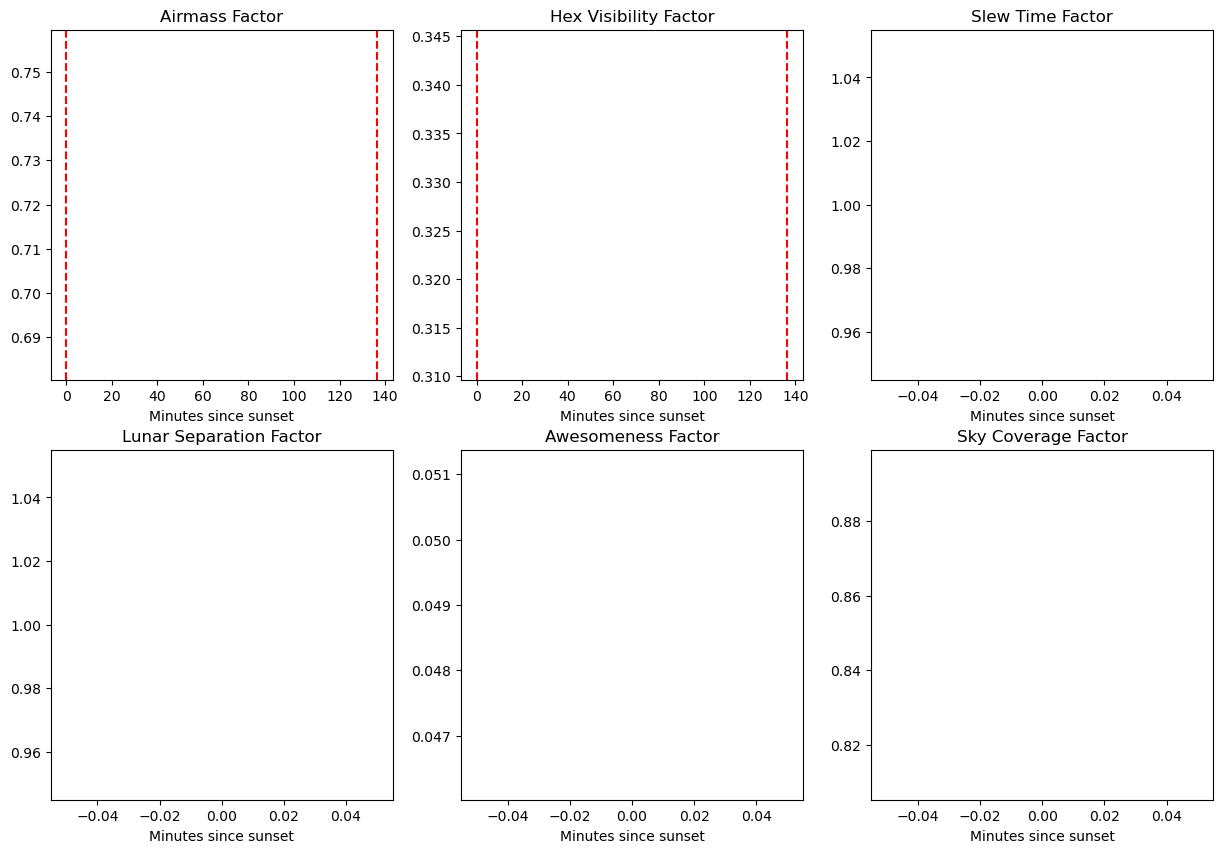

In [30]:
# hex_test = outer_hexlist[0]
#plt.plot(hex_test.mjd_list, hex_test.awesomeness_factor_list)
# print(sunset)
# hex_test = og_inner_hexlist[11]
# print(hex_test.prob)
# print(hex_test.coverage_factor, hex_test.ra, hex_test.dec)
# print(hex_test_time)
# print(mjd_decimal_to_minutes_since_sunset([hex_test_time], sunset))
af.plot_testhex(hex_test, sunset)

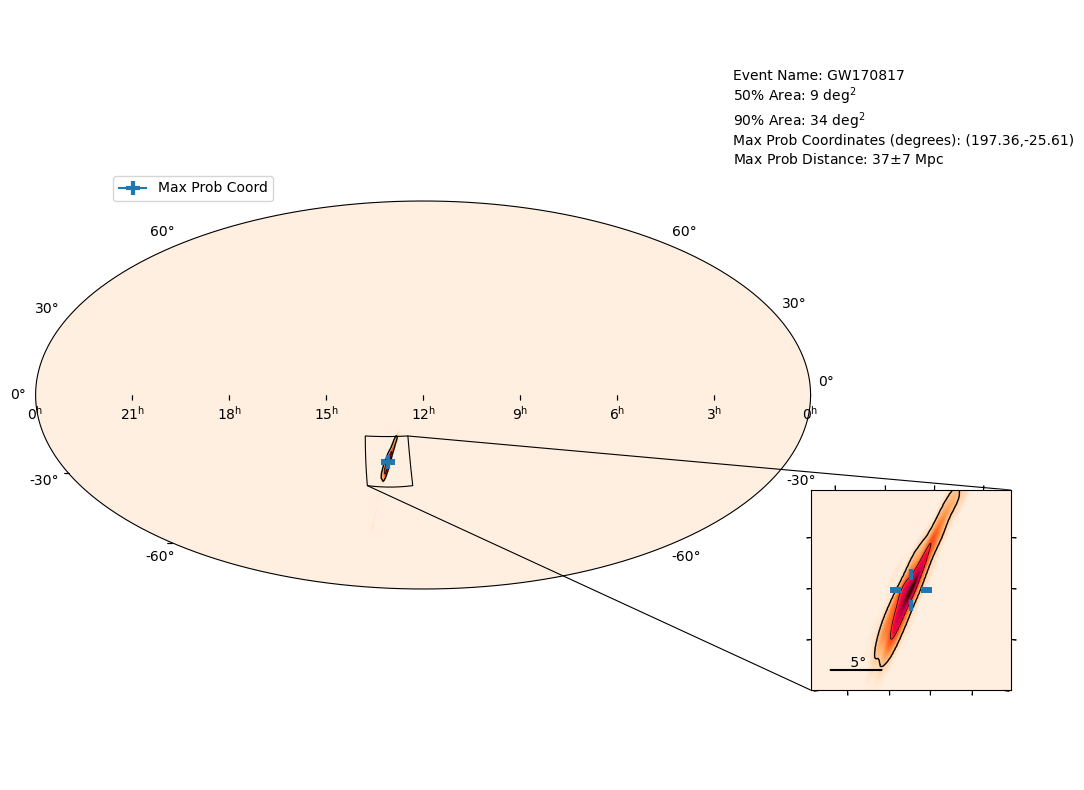

In [102]:
af.make_skymap_plot(this_skymap, 'GW170817')

In [103]:
ra_in, dec_in = af.extract_coordinates(og_inner_hexlist)
ra_obs, dec_obs = af.extract_coordinates(obs_order)
ra_out, dec_out = af.extract_coordinates(og_outer_hexlist)
    
all_in_ras, all_in_decs = af.generate_coordinates(ra_in, dec_in)
obs_ras, obs_decs = af.generate_coordinates(ra_obs, dec_obs)
all_out_ras, all_out_decs = af.generate_coordinates(ra_out, dec_out)

In [104]:
from astropy.table import Table
real_obs = Table.read('realgwobs.csv')

In [105]:
print(real_obs['ra'])

    ra   
---------
190.43368
190.43368
191.27037
191.27037
 190.3914
 190.3914
      ...
199.05092
199.05092
199.88532
199.88532
199.97698
199.97698
Length = 141 rows


In [106]:
real_ras = [float(r)-360 for r in real_obs['ra'][(real_obs['filter'] == 'i') & (real_obs['expid'] <= 668458)]]
real_decs = [float(r) for r in real_obs['dec'][(real_obs['filter'] == 'i') & (real_obs['expid'] <= 668458)]]
# print(real_ras, real_decs)
all_real_ras, all_real_decs = af.generate_coordinates(real_ras, real_decs)

In [107]:
print(30*len(real_ras))

1080


In [108]:
#af.plot_hexes_on_skymap(real_ras, real_decs, all_real_ras, all_real_decs, this_skymap, eventname='GW170817')

In [109]:
#af.plot_hexes_on_skymap(ra_in, dec_in, all_in_ras, all_in_decs, this_skymap, eventname='GW170817')

In [110]:
#af.plot_hexes_on_skymap(ra_out, dec_out, all_out_ras, all_out_decs, this_skymap, eventname='GW170817')

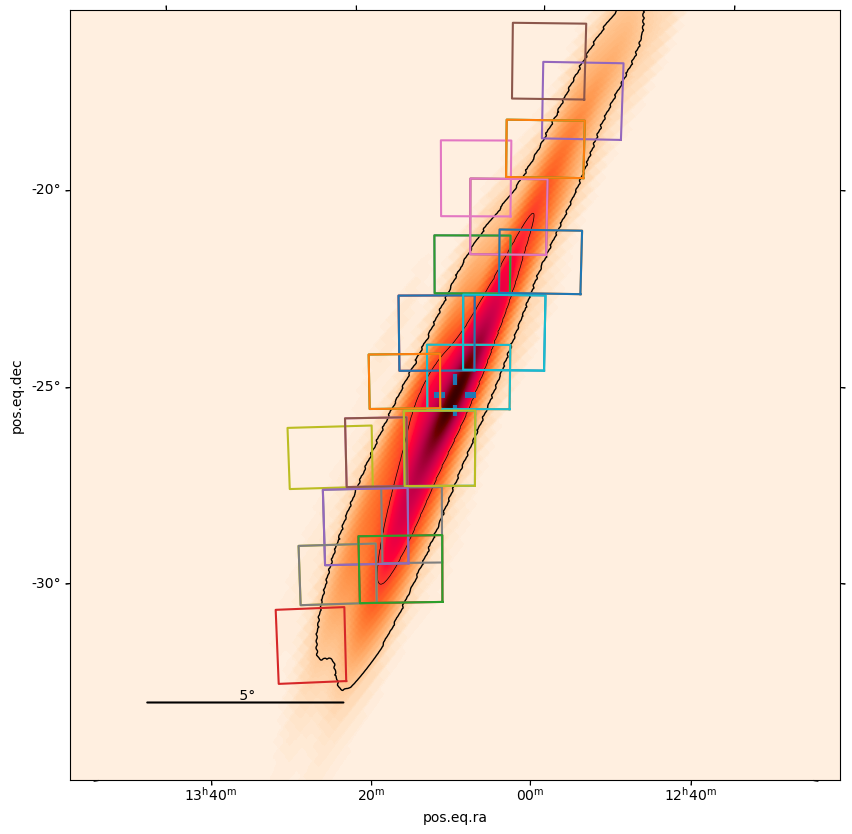

In [111]:
af.plot_hexes_on_skymap(ra_obs, dec_obs, obs_ras, obs_decs, this_skymap, eventname='GW170817')

In [112]:
def get_ccd_corners(ccd):
    # Open the file
    with open('zeroed_corners.list', 'r') as file:
        # Read the header line
        header = file.readline().strip().split(',')

        # Find the column index for the specified CCD
        ccd_index = header.index('CCD')
        ccd = f'{ccd}.0'
        
        # Find the column indices for the corner coordinates
        corner1_ra_index = header.index('Corner 1 Ra')
        corner1_dec_index = header.index('Corner 1 Dec')
        corner2_ra_index = header.index('Corner 2 Ra')
        corner2_dec_index = header.index('Corner 2 Dec')
        corner3_ra_index = header.index('Corner 3 Ra')
        corner3_dec_index = header.index('Corner 3 Dec')
        corner4_ra_index = header.index('Corner 4 Ra')
        corner4_dec_index = header.index('Corner 4 Dec')

        # Iterate through the file lines
        for line in file:
            # Split the line into columns
            columns = line.strip().split(',')

            # Check if the CCD matches the specified value
            #print(columns[ccd_index], ccd)
            if columns[ccd_index] == ccd:
                # Extract the corner coordinates
                value = 1
                corner1 = [value*float(columns[corner1_ra_index]), value*float(columns[corner1_dec_index])]
                corner2 = [value*float(columns[corner2_ra_index]), value*float(columns[corner2_dec_index])]
                corner3 = [value*float(columns[corner3_ra_index]), value*float(columns[corner3_dec_index])]
                corner4 = [value*float(columns[corner4_ra_index]), value*float(columns[corner4_dec_index])]
                # Return the list of corner coordinates
                return [corner1, corner2, corner3, corner4]

    # If the CCD is not found, return None
    return None

In [113]:

import matplotlib.path as mpath
def get_ipossible(raCenter = 0.0, decCenter=0.0, n=1000, radius=1.4):
    xs = np.linspace(-radius, radius, n)
    ys = np.linspace(-radius, radius, n)
    
    xlist = []
    ylist = []

    for x in xs:
        for y in ys:
            xlist.append(x+raCenter)
            ylist.append(y+decCenter)

    ra = np.array(xlist)
    dec = np.array(ylist) 
    
    i_possible = decam2hp.isCatalogInHex(raCenter, decCenter, ra, dec)
#     print(i_possible)

    return(ra[i_possible], dec[i_possible], np.ones(i_possible.size))
def ccd_outlines(ccd_corners):
    # Create a matplotlib Path object
    path_data = []
    for i, (ra, dec) in enumerate(ccd_corners):
#         path_data.append([ra, dec])
        if i == 0:
            # Move to the first corner
            path_data.append((mpath.Path.MOVETO, (ra, dec)))
        else:
            # Draw a line to the next corner
            path_data.append((mpath.Path.LINETO, (ra, dec)))

    # Close the path
    path_data.append((mpath.Path.CLOSEPOLY, (ccd_corners[0][0], ccd_corners[0][1])))

#    Create the matplotlib Path
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)

    return path

def sky_fraction(ra, dec, gridsize, raCenter=0.0, decCenter=0.0, plot=False, offset = [0, 0]):
    #creating a grid
    n_possible = gridsize
    
    #making an array of the ccd numbers, without missing ccds
    ccd_numbers = np.arange(1, 63)
    ixs = np.where((ccd_numbers != 2) & (ccd_numbers != 61) )
    ccd_numbers = ccd_numbers[ixs]

    all_covered_ras = []
    all_covered_decs = []
    patchlist = []
    

    for ccd in ccd_numbers:

        ccd_corners = get_ccd_corners(ccd)


        ccd_modified = ccd_corners.copy()  # Make a copy of ccd_corners
#         print(f'before: {ccd_modified}')
        for corner in ccd_modified:
            corner[0] = corner[0] + raCenter + offset[0]
            corner[1] = corner[1] + decCenter + offset[1]
#         print(f'after: {ccd_modified}')

        ccdoutline = ccd_outlines(ccd_modified)
        
        mask = ccdoutline.contains_points(tuple(zip(ra, dec)))
#         print(mask[np.where(mask == True)])
        covered = list(tuple(zip(ra, dec)))
#         print(len(covered))
        indices = np.arange(0, len(covered))
#         print(indices)
#         print(len(indices))
#         print(mask)
        covered_indices = indices[mask]
#         print(covered_indices)
        if len(covered_indices) != 0:
            covered_coords = np.array(covered)[np.array(covered_indices)]
#             print(covered_coords)
            for coord in covered_coords:
                all_covered_ras.append(coord[0])
                all_covered_decs.append(coord[1])
#             all_covered.append(covered_coords)
        if plot == True:
            patch = patches.PathPatch(ccdoutline, facecolor='orange', lw=2)
            patchlist.append(patch)
    if plot == True:
        return all_covered_ras, all_covered_decs, patchlist
    return all_covered_ras, all_covered_decs

In [114]:
def fraction_sky_covered(offset, raCenter, decCenter, n=1000, radius=1.4, plot=True):
    
    #get i_possible for given set of ras and decs
    ra, dec, i_possible = get_ipossible(raCenter = raCenter + offset[0], decCenter = decCenter + offset[1], 
                                        n = n, radius = radius)
#     print(f'ra: {ra} dec:{dec}')
#     fig, ax = plt.subplots()
    all_covered_ras, all_covered_decs, patchlist = sky_fraction(ra, dec, gridsize = i_possible.size, raCenter = raCenter, decCenter = decCenter, plot=plot, offset=offset)
#     for patch in patchlist:
#         ax.add_patch(patch)
#     ax.set_xlim(-162, -164.5)
#     ax.set_ylim(-24, -27)
    return all_covered_ras, all_covered_decs

#     print(all_covered)

In [115]:
zero_coverage_ra, zero_dec = fraction_sky_covered([0, 0], -163.234, -25.7, n=100)

In [116]:
# print(zero_coverage_ra, zero_dec)

In [117]:
everyra = []
everydec = []
everyprob = []
# all_offsets = [[0, 0], [0.06389, 0.287436], 
#            [-0.2395875, -0.135264],[-0.0479175, 0.388884], 
#            [-0.76668, 0.473424 ], [-0.4632025, 0.490332], 
#            [0.9423775, 0.405792], [-0.543065, -0.828492],
#            [0.76668, 0.4227], [0.0479175, 0.777768],
#            [-0.5257, 0.7222], [-1.1388, 0.0166], 
#            [0.0484, -0.6725], [0.9423775, -0.405792]]

# thisdither = all_offsets[1]
# for hexy in obs_order:
    
# thisdither = [-0.2395875, -0.135264]
for hexy in obs_order:
    cov_ra, cov_dec = fraction_sky_covered(hexy.dither, hexy.ra, hexy.dec, n=100)
    everyra.append(cov_ra)
    everydec.append(cov_dec)
    everyprob.append(hexy.prob)
#thisdither = [0.06389, 0.287436]
# thisdither = [0, 0]
# for hexy in og_inner_hexlist:
#     cov_ra, cov_dec = fraction_sky_covered(thisdither, hexy.ra, hexy.dec, n=100)
#     everyra.append(cov_ra)
#     everydec.append(cov_dec)
#     everyprob.append(hexy.prob)
# for hexy in og_outer_hexlist:
#     cov_ra, cov_dec = fraction_sky_covered(thisdither, hexy.ra, hexy.dec, n=100)
#     everyra.append(cov_ra)
#     everydec.append(cov_dec)
#     everyprob.append(hexy.prob)
    
# for i in range(len(real_ras)):
#     cov_ra, cov_dec = fraction_sky_covered([0, 0], real_ras[i], real_decs[i], n=100)
#     everyra.append(cov_ra)
#     everydec.append(cov_dec)
#     everyprob.append(0)
    

In [118]:
print(len(obs_order))

32


In [119]:
eventra = 197.450374-360
eventdec = -23.381495

In [120]:
print(eventra, eventdec)
for i in range(len(everyra)):
    ras = everyra[i]
    decs = everydec[i]
    for j in range(len(ras)):
        if (ras[j] >= eventra - 0.001) & (ras[j] <= eventra + 0.001) & (decs[j] >= eventdec - 0.001) & (decs[j] <= eventdec + 0.001):
            print(f'bingo, hit it at {i}, {ras[j]}, {decs[j]}')
        

-162.549626 -23.381495


36
Test point (-162.549626, -23.381495) is inside the polygon: True
pass 20, -161.568848, -25.951422, [0.06389, 0.287436]


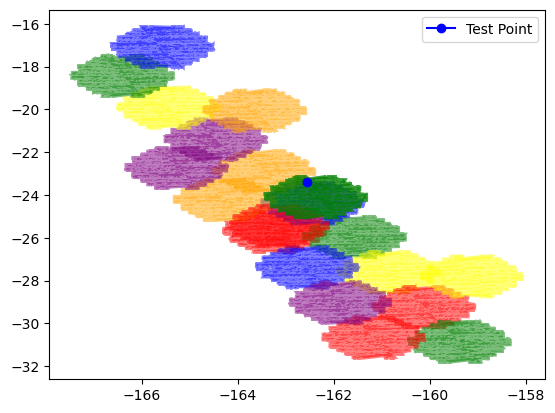

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
c = True
i = 0

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'red', 'green', 'blue', 'orange', 'purple', 'yellow', 'red', 'green', 'blue', 'orange', 'purple', 'yellow', 'red', 'green', 'blue', 'orange', 'purple', 'yellow', 'red', 'green', 'blue', 'orange', 'purple', 'yellow', 'red', 'green', 'blue', 'orange', 'purple', 'yellow']
print(len(colors))
fig, ax = plt.subplots()
alldecmins = []
alldecmax = []
allramins = []
allramax = []
# Example: Creating a grid of points
while i <= (len(everyra)-1):
    X = np.array(everyra[i])
    Y = np.array(everydec[i])
    alldecmins.append(np.min(everydec[i]))
    allramins.append(np.min(everyra[i]))
    alldecmax.append(np.max(everydec[i]))
    allramax.append(np.max(everyra[i]))
    # Create a meshgrid from x and y values
    # X, Y = np.meshgrid(x_values, y_values)
    # print(X, Y)
    # Flatten the arrays to get a list of points
    points = np.column_stack((X.flatten(), Y.flatten()))
    j = i
    if i >= len(colors):
        j = i - len(colors)
        if i >= 2*len(colors):
            j = i - 2*len(colors)
        if i >= 3*len(colors):
            j = i - 3*len(colors)
        if i >= 4*len(colors):
            j = i - 4*len(colors)
        if i >= 5*len(colors):
            j = i - 5*len(colors)
        if i >= 6*len(colors):
            j = i - 6*len(colors)
        if i >= 7*len(colors):
            j = i - 7*len(colors)
        if i >= 8*len(colors):
            j = i - 8*len(colors)
            print(j)
    
    # Create a Polygon patch
    polygon_patch = Polygon(points, closed=True, edgecolor='r', facecolor='r')
    # Create a figure and axis
    # Check if a point is inside the polygon
    test_point = (eventra, eventdec)  # Example test point

    # # Create a Path object from the Polygon vertices
    polygon_path = Path(polygon_patch.get_path().vertices)
    
    # print('made it here')
    # # Check if the test point is inside the polygon
    thisprob = everyprob[i]
    is_inside = polygon_path.contains_point(test_point)
#     print(is_inside)
    pathguy = patches.PathPatch(polygon_path, lw=2, edgecolor = colors[j], facecolor=colors[j], alpha=0.5)
    ax.add_patch(pathguy)
#     print(pathguy)
    i += 1
    if is_inside:
        print(f'Test point {test_point} is inside the polygon: {is_inside}')
        print(f'pass {i}, {obs_order[i].ra}, {obs_order[i].dec}, {obs_order[i].dither}')
#         fig, ax = plt.subplots()
        hititra = obs_order[i].ra
        hititdec = obs_order[i].dec

        # Add the patch to the axis
        ax.add_patch(pathguy)
        # shapely_polygon = ShapelyPolygon(polygon_patch.get_path().vertices)


        # Plot the test point
        ax.plot(test_point[0], test_point[1], marker='o', color='blue', label='Test Point')

        # Set axis limits based on your data
        # ax.set_xlim(min(x_values), max(x_values))
        # ax.set_ylim(min(y_values), max(y_values))

        # Show the plot
        plt.legend()
        plt.show()
        break
ax.scatter(eventra, eventdec, color='pink', label='event', s=50)
allramins.append(eventra-1)
allramax.append(eventra+4)
alldecmins.append(eventdec-1)
alldecmax.append(eventdec+1)

# print(allramax)
ax.set_xlim(np.min(allramins), np.max(allramax))
ax.set_ylim(np.min(alldecmins), np.max(alldecmax))
ax.legend()

In [122]:
from astropy.coordinates import Angle, SkyCoord

# Suppose you have a right ascension value in degrees
ra_degrees = -eventra

# Create a SkyCoord object with the given right ascension in degrees
coord = SkyCoord(ra=Angle(eventra, unit='degree'), dec=eventdec, unit='degree')
from astropy.coordinates import Angle

# Input right ascension in hours, minutes, and seconds
ra_string = "13h09m48.09s"

# Parse the string into an Angle object
ra_angle = Angle(ra_string)

# Access the right ascension in decimal hours
ra_decimal_hours = ra_angle.hour

# Print the result
print(f"Right Ascension in decimal hours: {ra_decimal_hours} hours")

coord2 = SkyCoord(ra=Angle(ra_decimal_hours, unit='hour'), dec=eventdec, unit='degree')
# Access the right ascension in hours
#ra_hours = coord.ra.hour
ra_hours = coord2.ra.hour

# Print the result
print(f"Right Ascension in degrees: {ra_degrees}°")
print(f"Right Ascension in hours: {ra_hours} hours")
ra_degrees = coord2.ra.deg
print(ra_degrees)

Right Ascension in decimal hours: 13.163358333333333 hours
Right Ascension in degrees: 162.549626°
Right Ascension in hours: 13.163358333333335 hours
197.45037499999998


In [123]:
for i in range(len(everyra)):
    allras = everyra[i]
    alldecs = everydec[i]
    for j in range(len(allras)):
        if ((allras[j] >= eventra-0.1) & (allras[j] <= eventra+0.1) & (alldecs[j] >= eventdec - 0.1) & (alldecs[j] <= eventdec + 0.1)):
            print(f'bingo, hit event on pass {i} with ra {allras[j]} dec {alldecs[j]}')

bingo, hit event on pass 2 with ra -162.62476538383837 dec -23.430519252525254
bingo, hit event on pass 2 with ra -162.62476538383837 dec -23.45880208080808
bingo, hit event on pass 3 with ra -162.62491456565658 dec -23.320381838383838
bingo, hit event on pass 3 with ra -162.62491456565658 dec -23.348664666666664
bingo, hit event on pass 3 with ra -162.5683489090909 dec -23.29209901010101
bingo, hit event on pass 3 with ra -162.59663173737374 dec -23.320381838383838
bingo, hit event on pass 3 with ra -162.62491456565658 dec -23.29209901010101
bingo, hit event on pass 3 with ra -162.5400660808081 dec -23.29209901010101
bingo, hit event on pass 3 with ra -162.59663173737374 dec -23.29209901010101
bingo, hit event on pass 3 with ra -162.5683489090909 dec -23.348664666666664
bingo, hit event on pass 3 with ra -162.5400660808081 dec -23.320381838383838
bingo, hit event on pass 3 with ra -162.59663173737374 dec -23.348664666666664
bingo, hit event on pass 3 with ra -162.5683489090909 dec -23

In [124]:
print(len(everyra))

32


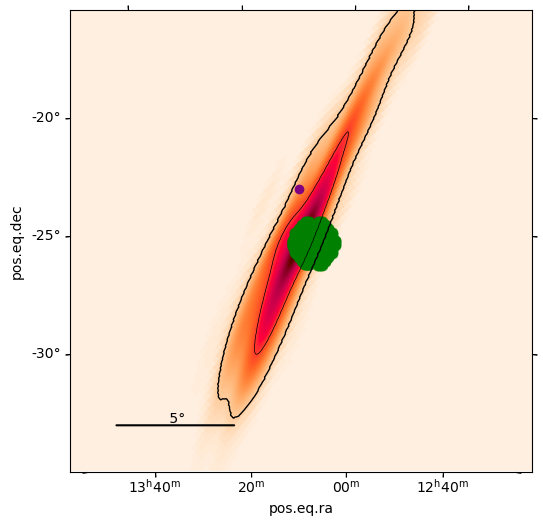

In [125]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
name = 'GW170817'
url = this_skymap
date = str(datetime.date.today())
area50, area90, maxprob_ra, maxprob_dec, maxprob_dist, maxprob_distsigma, levels, nside, prob = af.make_alert_skymap(url)

center = SkyCoord(maxprob_ra, maxprob_dec, unit="deg")  # defaults to ICRS frame
# print(maxprob_ra)

fig = plt.figure(figsize=(6, 6), dpi=100)
plt.box(False)
plt.xticks([])
plt.yticks([])

ax = plt.axes(
    projection='astro zoom',
    center=center,
    radius=10*u.deg)

for key in ['ra', 'dec']:
    ax.coords[key].set_ticklabel_visible(True)
    ax.coords[key].set_ticks_visible(True)


ax.scalebar((0.1, 0.1), 5 * u.deg).label()

ct = ax.contour_hpx(url, levels = levels, colors = ['black'], linewidths = [1,0.5])

ax.imshow_hpx(url, cmap='cylon')
ax.plot(
    maxprob_ra, maxprob_dec,
#     transform=ax.get_transform('world'),
    marker=ligo.skymap.plot.reticle(),
    markersize=20,
    markeredgewidth=3)
    
# for i in range(len(supertotal_ras)):
ax.scatter(eventra, eventdec, transform=ax.get_transform('world'), color='purple')

# ax.scatter(ra, dec, transform = ax.get_transform('world'))
sc = ax.scatter([], [], transform=ax.get_transform('world'), alpha=0.5, color=[])


def animate(i):
    sc.set_offsets(list(zip(everyra[i], everydec[i])))
    if i == 19:
        sc.set_color('purple')
    else:
        sc.set_color('green')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(everyra), interval=1000, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())
# writer = matplotlib.animation.PillowWriter(fps=2,bitrate=1800)
# ani.save('obsplan.gif', writer=writer)


In [52]:
print(obs_order)

[<hex_object.HexObject object at 0x7f65cc2925e0>, <hex_object.HexObject object at 0x7f65cc24a0d0>, <hex_object.HexObject object at 0x7f65cc24a4f0>, <hex_object.HexObject object at 0x7f63bd31e460>, <hex_object.HexObject object at 0x7f63bd31e280>, <hex_object.HexObject object at 0x7f63bd31e820>, <hex_object.HexObject object at 0x7f63bd32bd90>, <hex_object.HexObject object at 0x7f63bd32b4f0>, <hex_object.HexObject object at 0x7f63bd32bc40>, <hex_object.HexObject object at 0x7f63bd32b0d0>, <hex_object.HexObject object at 0x7f63beb77be0>, <hex_object.HexObject object at 0x7f63beb77880>, <hex_object.HexObject object at 0x7f65cc23da30>, <hex_object.HexObject object at 0x7f65cc23d2b0>, <hex_object.HexObject object at 0x7f63bd32b9d0>, <hex_object.HexObject object at 0x7f63beb77820>, <hex_object.HexObject object at 0x7f65cc23db20>, <hex_object.HexObject object at 0x7f63bd2cf0a0>, <hex_object.HexObject object at 0x7f65cc23da60>, <hex_object.HexObject object at 0x7f63bcfde5b0>, <hex_object.HexObje